In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df_notas = pd.read_csv("../bases/notas.csv")
df_sabao = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/medidas_sabao_em_po.csv")

<font size=3 color="#e7193b"> Desafio 1:</font> Baixe a base de dados com as notas das turmas de Data Visualization e crie o violinplot, buscando interpretar as diferenças entre cada uma delas e documentando os seus achados. Sinta-se livre para adicionar alguns dos recursos que aprendemos ao longo do curso, como anotações, textos e figuras.

In [3]:
df_notas.head(0)

,Turma,Nota


In [162]:
df_notas.groupby("Turma")["Nota"].describe()


,count,mean,std,min,25%,50%,75%,max
Turma,,,,,,,,
Turma 1,100.0,73.54,8.165485,51.0,69.0,73.0,78.25,91.0
Turma 2,100.0,79.60,4.794778,70.0,75.0,80.0,82.00,93.0
Turma 3,100.0,69.92,6.492700,50.0,66.0,70.0,74.00,93.0


In [160]:
medianas = df_notas.groupby("Turma").median()
medianas.T

Turma,Turma 1,Turma 2,Turma 3
Nota,73.0,80.0,70.0


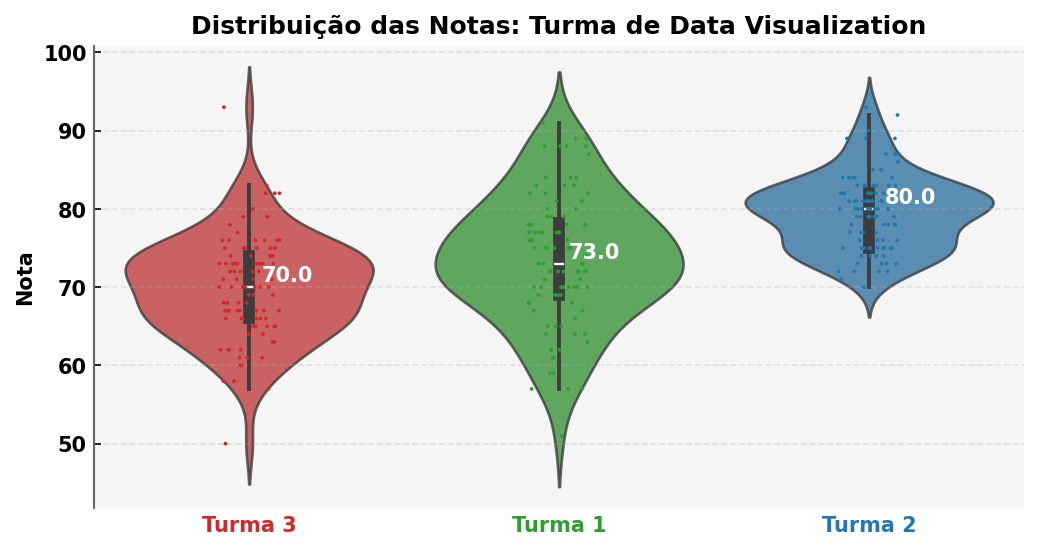

In [398]:
plot_order: pd.Index = df_notas.groupby("Turma")["Nota"].median().sort_values().index

fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
# fig.set_facecolor("whitesmoke")
ax.set_facecolor("whitesmoke")
ax.set_title(
    label="Distribuição das Notas: Turma de Data Visualization",
    loc="center",
    fontweight="bold",
)
colors = ["tab:red", "tab:green", "tab:blue"]
sns.violinplot(
    data=df_notas,
    x="Turma",
    y="Nota",
    hue="Turma",
    palette=colors,
    order=plot_order,
    hue_order=plot_order,
    alpha=0.8
)
sns.stripplot(data=df_notas, x="Turma", y="Nota", hue="Turma",palette=colors, size=1.8, hue_order=plot_order)
ax.tick_params(axis="y", which="major", direction="in")
ax.tick_params(axis="x", which="major", length=0)
ax.set_xlabel("")
ax.set_ylabel("Nota", fontweight="bold")
ax.grid(axis="y", zorder=2, ls="--", alpha=0.3)

for idx, t in enumerate(ax.get_xticklabels()):
    t.set_color(colors[idx])
    t.set_fontweight("bold")
for t in ax.get_yticklabels():
    t.set_fontweight("bold")

ax.spines[["top", "bottom", "left", "right"]].set(linewidth=1, color="dimgray")
sns.despine(ax=ax, bottom=True)
# Anotação das Medianas
ax.text(transform=ax.transAxes, x=0.51, y=0.54, s=f"{medianas.loc["Turma 1", "Nota"]}", color="white", fontdict=dict(fontweight="bold"))
ax.text(transform=ax.transAxes, x=0.85, y=0.66, s=f"{medianas.loc["Turma 2", "Nota"]}", color="white",fontdict=dict(fontweight="bold"))
ax.text(transform=ax.transAxes, x=0.18, y=0.49, s=f"{medianas.loc["Turma 3", "Nota"]}", color="white",fontdict=dict(fontweight="bold"))
fig.savefig("../galeria_desafios_dataviz/violinplot_notas-alunos.png", bbox_inches="tight")
plt.show()

<font size=3 color="#e7193b"> Desafio 2:</font> Crie o gráfico de dispersão que distribua as medidas de comprimento e largura da amostra B. Desenhe no gráfico as linhas de rejeição para os itens em que o valor de comprimento e largura seja acima de 2% ou abaixo do valor de 20 cm e 5 cm, respectivamente.

In [171]:
df_B = df_sabao.query("amostra == 'B'")[["comprimento", "largura"]].copy()
df_B

,comprimento,largura
200,19.97,5.10
201,20.13,4.94
202,20.12,4.95
203,20.04,4.96
204,19.97,4.98
...,...,...
395,20.07,4.96
396,20.06,5.03
397,20.08,5.02
398,20.00,5.09


In [176]:
df_B.describe().T

,count,mean,std,min,25%,50%,75%,max
comprimento,200.0,20.02745,0.060125,19.91,19.98,20.02,20.06,20.23
largura,200.0,5.00150,0.054971,4.85,4.97,5.00,5.04,5.14


In [216]:
intervalo_comprimento = df_B.comprimento.max() - df_B.comprimento.min()
intervalo_largura = df_B.largura.max() - df_B.largura.min()

print(f"Intervalo Comprimento: {intervalo_comprimento:.2f}cm")
print(f"Intervalo Largura: {intervalo_largura:.2f}cm")
razao = intervalo_comprimento / intervalo_largura
print(razao)

Intervalo Comprimento: 0.32cm
Intervalo Largura: 0.29cm
1.1034482758620698


5.517241379310349

In [302]:
comprimento = df_B.comprimento.to_numpy()
largura = df_B.largura.to_numpy()

pct = 0.02

# 20 * 0.98 <=c <= 20 * 1.02
cmin = 20 * (1 - pct)
cmax = 20 * (1 + pct)

# 5 * 0.98 <= c <= 5 * 1.02
lmin = 5 * (1 - pct)
lmax = 5 * (1 + pct)

# Máscara
aceitos = (comprimento >= cmin) & (comprimento <= cmax) & (largura >= lmin) & (largura <= lmax)

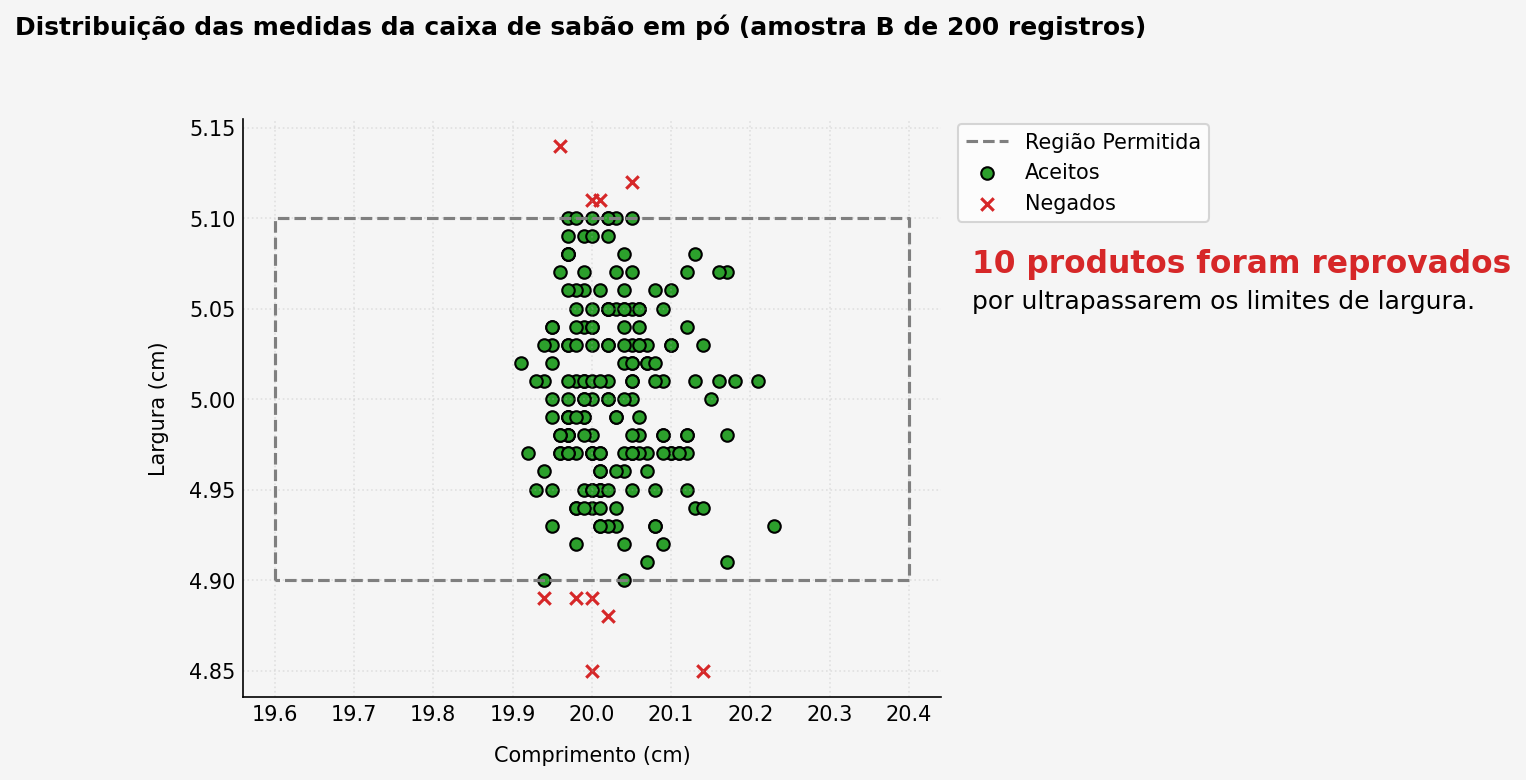

In [399]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=150)
fig.set_facecolor("whitesmoke")
ax.set_facecolor("whitesmoke")
fig.suptitle(
    x=0.5,
    y=1.02,
    t="Distribuição das medidas da caixa de sabão em pó (amostra B de 200 registros)", fontweight="bold")
# Região de aceitação
p1 = (cmin, lmin)
p2 = (cmin, lmax)
p3 = (cmax, lmax)
p4 = (cmax, lmin)
vertices = [p1, p2, p3, p4, p1]
x_coords = [p[0] for p in vertices]
y_coords = [p[1] for p in vertices]

ax.plot(x_coords, y_coords, ls="--", color="tab:gray", label="Região Permitida")

ax.scatter(
    comprimento[aceitos],
    largura[aceitos],
    color="tab:green",
    # alpha=0.7,
    label="Aceitos",
    edgecolors="k"
)
ax.scatter(
    comprimento[~aceitos],
    largura[~aceitos],
    color="tab:red",
    # alpha=0.8,
    label="Negados",
    marker="x",
)

ax.tick_params(length=0)
ax.set_xlabel("Comprimento (cm)", labelpad=10)
ax.set_ylabel("Largura (cm)",labelpad=10)
ax.tick_params(axis="both")
ax.legend(bbox_to_anchor=(1.4, 1.01))
ax.grid(alpha=0.3, ls=":")
sns.despine()
fontdict = dict(color="tab:red", size=15, weight="bold")
ax.text(
    x=20.48,
    y=5.07,
    s=f"{sum(~aceitos)} produtos foram reprovados",
    transform=ax.transData,
    fontdict=fontdict,
)
ax.text(
    x=20.48,
    y=5.05,
    s="por ultrapassarem os limites de largura.",
    transform=ax.transData,
    size=12,
)
fig.savefig("../galeria_desafios_dataviz/scatter-sabao-em-po.png", bbox_inches="tight")
plt.show()